# INTRODUCTION

Inability to pay the loan has been an issue which the banks are facing since years worlwide. What happens exactly is, the customer agrees to pay a certain amount on interest on the "Amount Funded" to the banks which is made as an agreement before the loan is sanctioned. Due to unforeseen events like jos-loss or death of the customer, the customer or the joint agreed members are unable to pay the loan/EMI on time for months or years, or sometimes, it may be intentional as well.

<br>



#PROBLEM STATEMENT:<br>
Due to this non-repayment of loans, it has different impact on the banks as well as the customers:<br>

1. For the customers, the customer's financial score reduces as a result they are not able to apply for further loans with other banks or financial institutions or sometimes, they even need to surrender the asset being financed. <br>

2. For the bank, the non-repayment of loan comes with increased NPAs(Non-Performing Assets) which leads to surge in annual losses for the bank, eventually leading to lesser Stakeholder's dividend.<br>

In order to tackle this situation, we are using the given dataset to foresee the bank loan defaulters. We will build a model by using the given data in the respective columns like funded amount, tenure of the loan, interest rate and delinquency. Building the model will anticipate whether the customer will default in the loan in the future.<br>

Working on these models, it will be beneficial for the banks to mitigate the risk. As a result of this, the economy of the country would also be impacted in a positive way.<br>
The data set was downloded from kaggle:- https://www.kaggle.com/datasets/hemanthsai7/loandefault


# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

# Reading data

In [ ]:
default_fin_df = pd.read_csv("train.csv")
default_fin_df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


Checking if their is any null value included in the data set

In [ ]:
default_fin_df.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

All the columns have zero null values

In [ ]:
default_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [ ]:
default_fin_df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


From the above data, it can be observed that:<br>
The maximum loan amount given is 35000<br>
The maximum intreset rate is 27%<br>
The average of the intrest rate is around 11%

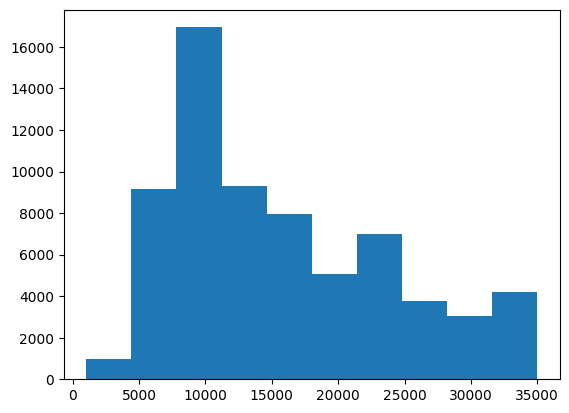

In [ ]:
plt.hist(default_fin_df["Funded Amount"])
plt.show()

The frequency of funding loan amount around 10000 is more compared to other amounts, or in another words, more than 16000 people opted for "Amount Funded" in the range of 10000.

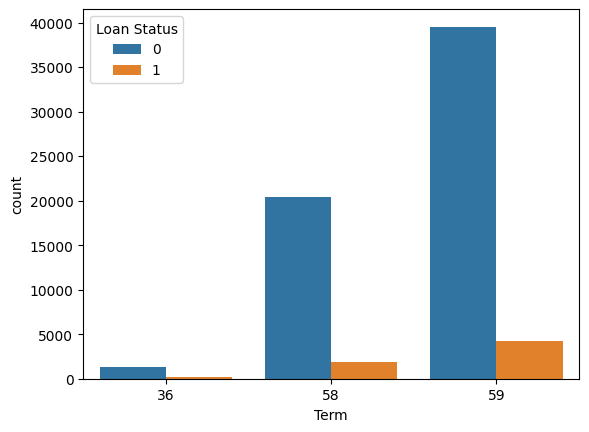

In [ ]:
sns.countplot(x = default_fin_df["Term"],hue = default_fin_df["Loan Status"])
plt.show()

Around 40,000 people opted for the loan tenure being around 59(months). 0 showing non-defaulters and 1 showing defualters, so, the maximum number of defaulters are from the LOAN TENURE 59 months.

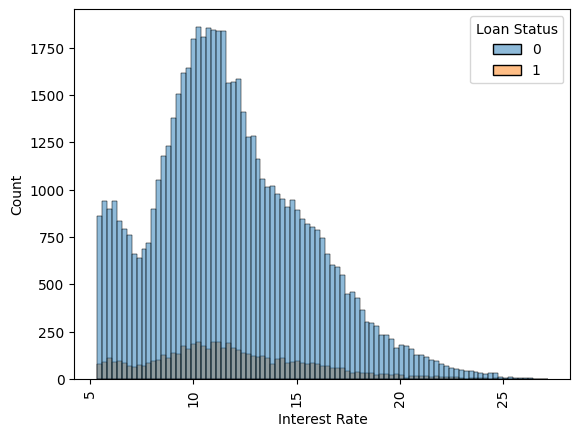

In [ ]:
sns.histplot(x = default_fin_df["Interest Rate"],hue = default_fin_df["Loan Status"])
plt.xticks(rotation=90)
plt.show()

The above graph shows that the people having higher interest rate have more tendency to default as they fail to pay higher interest amounts.

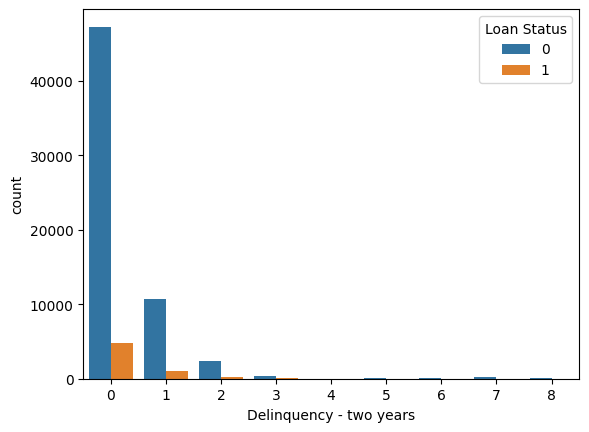

In [ ]:
sns.countplot(x = default_fin_df["Delinquency - two years"],hue= default_fin_df["Loan Status"])
plt.show()

The above graph shows the delinquency in the past two years.

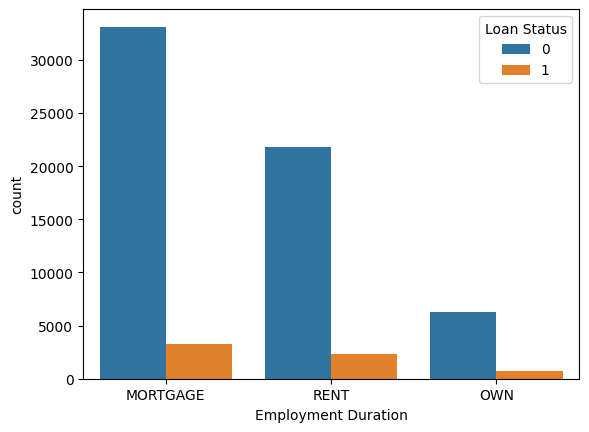

In [ ]:
sns.countplot(x = default_fin_df["Employment Duration"],hue = default_fin_df["Loan Status"])
plt.show()

We can observe from the above graph that the peope who took the loan on MORTAGEGED assets have more tendency to default.

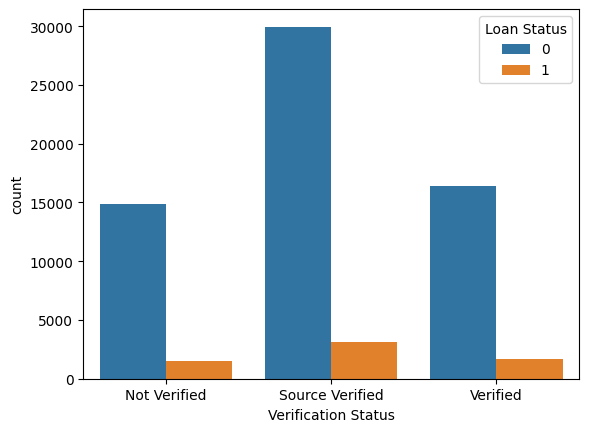

In [ ]:
sns.countplot(x = default_fin_df["Verification Status"],hue = default_fin_df["Loan Status"])
plt.show()

The above graph shows whether the verification was done or not.

In [ ]:

default_fin_df["Loan Title"].nunique()

109

In [ ]:
default_fin_df["Batch Enrolled"].nunique()

41

In [ ]:
default_fin_df["Sub Grade"].nunique()

35

As this value have more than 35 unique values the data is of no use for us

In [ ]:
default_fin_df = default_fin_df.drop(["Loan Title","Batch Enrolled","Sub Grade"],axis=1)
default_fin_df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,11.135007,B,MORTGAGE,176346.62670,Not Verified,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,12.237563,C,RENT,39833.92100,Source Verified,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,12.545884,F,MORTGAGE,91506.69105,Source Verified,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,16.731201,C,MORTGAGE,108286.57590,Source Verified,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,15.008300,C,MORTGAGE,44234.82545,Source Verified,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
default_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Interest Rate                 67463 non-null  float64
 6   Grade                         67463 non-null  object 
 7   Employment Duration           67463 non-null  object 
 8   Home Ownership                67463 non-null  float64
 9   Verification Status           67463 non-null  object 
 10  Payment Plan                  67463 non-null  object 
 11  Debit to Income               67463 non-null  float64
 12  Delinquency - two years       67463 non-null  int64  
 13  I

Using label encoder for changing the object data type data into numeric value

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()

In [ ]:
default_fin_df["Grade"] = lb.fit_transform(default_fin_df["Grade"])
default_fin_df["Employment Duration"] = lb.fit_transform(default_fin_df["Employment Duration"])
default_fin_df["Verification Status"] = lb.fit_transform(default_fin_df["Verification Status"])
default_fin_df["Initial List Status"] = lb.fit_transform(default_fin_df["Initial List Status"])
default_fin_df["Application Type"] = lb.fit_transform(default_fin_df["Application Type"])


Dropping ID and payment plan

In [ ]:
default_fin_df.drop(["ID","Payment Plan"],axis=1,inplace=True)
default_fin_df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,1,0,176346.62670,0,16.284758,...,2.498291,0.793724,0,0,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,2,2,39833.92100,1,15.412409,...,2.377215,0.974821,0,0,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,5,0,91506.69105,1,28.137619,...,4.316277,1.020075,0,0,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,2,0,108286.57590,1,18.043730,...,0.107020,0.749971,0,0,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,2,0,44234.82545,1,17.209886,...,1294.818751,0.368953,0,0,18,0,430,126029,22579,0


In [ ]:
default_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  int64  
 6   Employment Duration           67463 non-null  int64  
 7   Home Ownership                67463 non-null  float64
 8   Verification Status           67463 non-null  int64  
 9   Debit to Income               67463 non-null  float64
 10  Delinquency - two years       67463 non-null  int64  
 11  Inquires - six months         67463 non-null  int64  
 12  Open Account                  67463 non-null  int64  
 13  P

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Scaling the data to appropriate value

In [ ]:
scale  = MinMaxScaler()

In [ ]:
num_arr = ["Loan Amount","Funded Amount","Funded Amount Investor","Interest Rate","Grade","Home Ownership","Debit to Income","Recoveries","Collection Recovery Fee","Collection 12 months Medical","Last week Pay","Total Collection Amount","Total Revolving Credit Limit","Delinquency - two years","Inquires - six months","Open Account","Public Record","Revolving Balance","Revolving Utilities","Total Accounts","Initial List Status","Total Received Interest","Total Received Late Fee"]
default_fin_df[num_arr] = scale.fit_transform(default_fin_df[num_arr])
default_fin_df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,0.264403,0.918699,0.330964,59,0.265983,0.166667,0,0.412699,0,0.400709,...,0.000574,0.004757,0.0,0,0.304348,0,0.001827,311301,0.028071,0
1,0.076355,0.321495,0.326910,59,0.316414,0.333333,2,0.064442,1,0.378315,...,0.000546,0.005843,0.0,0,0.677019,0,0.003167,182610,0.099341,0
2,0.802154,0.244137,0.604649,59,0.330517,0.833333,0,0.196264,1,0.704983,...,0.000991,0.006114,0.0,0,0.409938,0,0.002010,89801,0.125669,0
3,0.298829,0.174783,0.494688,59,0.521957,0.333333,0,0.239071,1,0.445864,...,0.000025,0.004495,0.0,0,0.242236,0,0.002375,9189,0.295820,0
4,0.467134,0.359335,0.366690,59,0.443150,0.333333,0,0.075669,1,0.424458,...,0.297354,0.002211,0.0,0,0.111801,0,0.026127,126029,0.107804,0


In [ ]:
y = default_fin_df["Loan Status"]
X = default_fin_df.drop(["Loan Status"],axis=1)

Splitting the data into train and test.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(47224, 29)
(47224,)


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression()

In [ ]:
lg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_test_pred = lg.predict(X_test)
y_train_pred = lg.predict(X_train)

In [ ]:
score = lg.score(X_test,y_test)
print(score)
print(lg.score(X_train,y_train))

0.9085429121992193
0.9070387938336439


Calculating the variance using Logistic Regression, it gave the value around 90%.

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import r2_score
dmodel = DecisionTreeClassifier(max_depth=8)
dmodel.fit(X_train,y_train)
y_pred_test = dmodel.predict(X_test)
r2 = r2_score(y_test,y_pred_test)
print(r2)

-0.12980043476079084


The data is underfitting we will check for the logistic regression how it evaluates

In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train,y_train_pred)
print(confusion)


[[42834     0]
 [ 4390     0]]


The confusion matrix seems imbalance therfore we need to make the data set balnaced

The above data set is quite imbalance data set therfore we need to balance it using oversampling method

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [ ]:
sample = RandomOverSampler()

In [ ]:
import numpy as np
y = default_fin_df["Loan Status"]
X = default_fin_df.drop("Loan Status",1)


<ipython-input-40-b94c361c5a22>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = default_fin_df.drop("Loan Status",1)


In [ ]:
X_rs,y_rs = sample.fit_resample(X,y)
y_rs.shape

(122444,)

In [ ]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_rs,y_rs,train_size=0.7)

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,log_loss,confusion_matrix,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
print(X_train1.shape)

print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(85710, 29)
(85710,)
(36734, 29)
(36734,)


# K_NEIGHBOUR CLASSIFIER

In [ ]:
kMean = KNeighborsClassifier()
kMean.fit(X_train1,y_train1)
y_kpredTest = kMean.predict(X_test1)


In [ ]:
roc_auc_score(y_test1,y_kpredTest)

0.8246091229419155

# RANDOM FOREST CLASSIFIER

In [ ]:
rand_classi = RandomForestClassifier()
rand_classi.fit(X_train1,y_train1)
y_rpredTest = rand_classi.predict(X_test1)
y_rpredTrain = rand_classi.predict(X_train1)
print(roc_auc_score(y_test1,y_rpredTest))

0.9995912138224232


Using Random Forest Classifier, it gave the accuracy of 99%.

In [ ]:

print(log_loss(y_test1,y_rpredTest))
print(log_loss(y_train1,y_rpredTrain))

0.014718103142504638
2.2204460492503136e-16


# Hyperparameter Tuning

In [ ]:
param = {"n_estimators":[10,20,30,40,50],
         "max_depth":[5,10,15,20,25]}


In [ ]:
rand_classi1 = GridSearchCV(RandomForestClassifier(),param_grid = param)
rand_classi1.fit(X_train1,y_train1)
print(rand_classi1.best_estimator_)

RandomForestClassifier(max_depth=25, n_estimators=50)


In [ ]:
best_reg = RandomForestClassifier(max_depth = 25)
best_reg.fit(X_train1,y_train1)
y_best_pred = best_reg.predict(X_test1)
print(roc_auc_score(y_test1,y_best_pred))
print(log_loss(y_test1,y_best_pred))

0.9995640206968454
0.0156993100186716


# Support Vector machine

In [ ]:
from sklearn import svm

In [ ]:
svc = svm.SVC().fit(X_train1,y_train1)

In [ ]:
y_svc_test_predict = svc.predict(X_test1)
print(r2_score(y_test1,y_svc_test_predict))
print(roc_auc_score(y_test1,y_svc_test_predict))

-0.9555748129187214
0.5109787423806521


The score for svm is also less

therefore we will select Random forest Classifier as the best fitted algotithm for this data set

# CONCLUCION:<br>
After using K-Neighbour Classifier, Random Forest Classifier and Support Vector Machine, it is found that Random Forest Classifier is the best algorithm. The random forest classifier is giving 2% of error on the predicted value with the accuracy percentage of 99%.

# RECOMMENDATION:<br>

Using the respective algorithms, it is recommended that the customers should be sanctioned the loan with LOAN TENURE less that 59 months, as with higher tenure, the chances of delinquency increases.<br>

The source or the verification of the customer must be done properly.<br>

The interest rate should be kept at an average of 10-14% annually, as the higher ROI impacts the repayment of loans.<br>

The customers who have sanctioned loans on MORTAGAGED ASSETS are defaulting more, so we should do proper verification before sanctioning the loan.

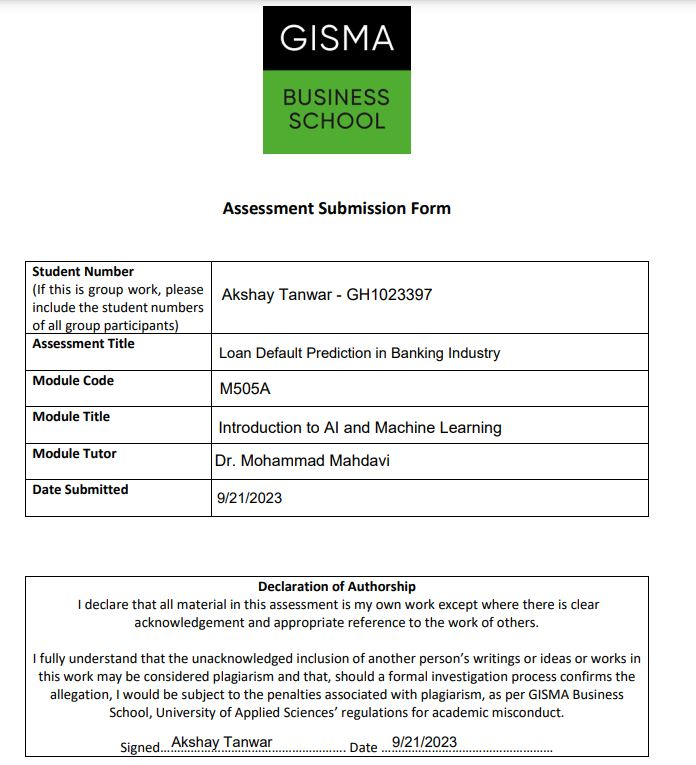

In [1]:
%%shell
jupyter nbconvert --to html ML_PROJECT_AKSHAY_TANWAR_GH1023397.ipynb

[NbConvertApp] Converting notebook ML_PROJECT_AKSHAY_TANWAR_GH1023397.ipynb to html
[NbConvertApp] Writing 976420 bytes to ML_PROJECT_AKSHAY_TANWAR_GH1023397.html
